## Customer segmentation (RFM) analysis

### Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Load data

In [6]:
data = pd.read_csv('Online Retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Delete null values

In [8]:
data = data.dropna()

In [9]:
data.shape

(406829, 8)

In [10]:
data['Total Amount'] = (data['Quantity'] * data['UnitPrice']) * 120 # Doller to BDT
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1836.0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2440.8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2640.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2440.8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2440.8


### Convert float to int

In [12]:
data[['CustomerID','Total Amount']] = data[['CustomerID','Total Amount']].astype('int')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,1835
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,2440
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,2640
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,2440
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,2440


### Seperate columns to Analysis RFM

In [14]:
data_1 = data[['CustomerID','InvoiceNo','InvoiceDate','Total Amount']].copy() # Copy column fron data table
data_1['InvoiceDate'] = pd.to_datetime(data_1['InvoiceDate']) # Convert date time
data_1['InvoiceDate'] = data_1['InvoiceDate'].dt.date # Extract only date
data_1.head(10)

,CustomerID,InvoiceNo,InvoiceDate,Total Amount
0,17850,536365,2010-12-01,1835
1,17850,536365,2010-12-01,2440
2,17850,536365,2010-12-01,2640
3,17850,536365,2010-12-01,2440
4,17850,536365,2010-12-01,2440
5,17850,536365,2010-12-01,1836
6,17850,536365,2010-12-01,3060
7,17850,536366,2010-12-01,1332
8,17850,536366,2010-12-01,1332
9,13047,536367,2010-12-01,6489


In [15]:
# Download this data
data_1.to_csv('rfm_data.csv', index=False)

In [17]:
# Reference date (today's date or analysis cut-off)
today = datetime(2011, 12, 15).date()
today

datetime.date(2011, 12, 15)

### RFM Calculation

In [21]:

rfm = data_1.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today - x.max()).days,  # Recency
    'InvoiceNo': 'count',                             # Frequency
    'Total Amount': 'sum'                              # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346,331,2,0
1,12347,8,182,517179
2,12348,81,31,215666
3,12349,24,73,210889
4,12350,316,17,40125
...,...,...,...,...
4367,18280,283,10,21671
4368,18281,186,7,9695
4369,18282,13,13,21190
4370,18283,9,756,251262


### Segmentation of RFM score

In [25]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 3, labels = [3,2,1])
rfm['F_score'] = pd.qcut(rfm['Frequency']. rank(method='first'), 3 , labels = [1,2,3])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 3, labels = [1,2,3])

In [26]:
# Combine RFM score
rfm['RFM_Score'] = rfm['R_score'].astype('str') + rfm['F_score'].astype('str') + rfm['M_score'].astype('str')
rfm

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
0,12346,331,2,0,1,1,1,111
1,12347,8,182,517179,3,3,3,333
2,12348,81,31,215666,2,2,3,223
3,12349,24,73,210889,3,2,3,323
4,12350,316,17,40125,1,1,1,111
...,...,...,...,...,...,...,...,...
4367,18280,283,10,21671,1,1,1,111
4368,18281,186,7,9695,1,1,1,111
4369,18282,13,13,21190,3,1,1,311
4370,18283,9,756,251262,3,3,3,333


### Classification of customer base on RFM_Segment

In [28]:
def customer_segment(row):
    if row['RFM_Score'] == '333':
        return('Best Customer')
    elif row['R_score'] == 3:
       return('Loyal Customer')
    elif row['R_score'] == 1 and row['F_score'] <= 2 :
       return('Churned')
    elif row['R_score'] >= 2 and row['F_score'] <= 2 :
        return('New Customer')
    elif row['R_score'] == 1 and row['F_score'] >= 2 :
        return('At Risk')
    else:
        return('Regular')

rfm['Segment'] = rfm.apply(customer_segment, axis=1)

In [30]:
rfm

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
0,12346,331,2,0,1,1,1,111,Churned
1,12347,8,182,517179,3,3,3,333,Best Customer
2,12348,81,31,215666,2,2,3,223,New Customer
3,12349,24,73,210889,3,2,3,323,Loyal Customer
4,12350,316,17,40125,1,1,1,111,Churned
...,...,...,...,...,...,...,...,...,...
4367,18280,283,10,21671,1,1,1,111,Churned
4368,18281,186,7,9695,1,1,1,111,Churned
4369,18282,13,13,21190,3,1,1,311,Loyal Customer
4370,18283,9,756,251262,3,3,3,333,Best Customer


### Count customer segment visualize with bar chart

In [32]:
rfm_segment = rfm['Segment'].value_counts().reset_index()
rfm_segment

,Segment,count
0,Churned,1297
1,New Customer,963
2,Loyal Customer,797
3,Best Customer,700
4,Regular,458
5,At Risk,157


In [41]:
pd.DataFrame(rfm_segment)

,Segment,count
0,Churned,1297
1,New Customer,963
2,Loyal Customer,797
3,Best Customer,700
4,Regular,458
5,At Risk,157


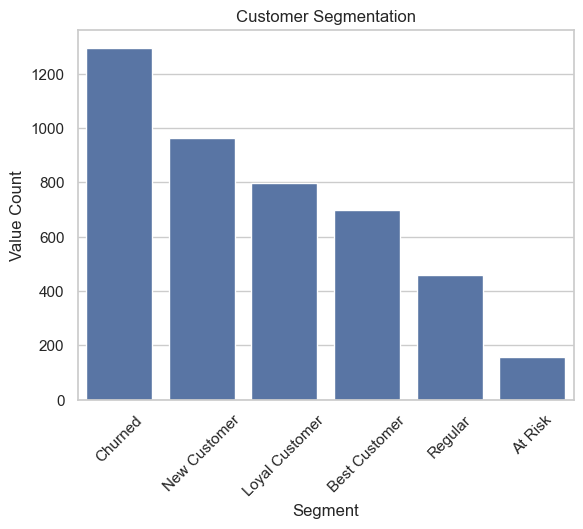

In [43]:
sns.set(style='whitegrid')
sns.barplot(data = rfm_segment, x = 'Segment', y = 'count')
plt.title('Customer Segmentation')
plt.xlabel('Segment')
plt.ylabel('Value Count')
plt.xticks(rotation=45)
plt.show()